In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
import os
print(os.getcwd())
engine = create_engine("sqlite:///hawaii.sqlite")

/Users/daniellesears/NU-VIRT-DATA-PT-04-2022-U-LOL/02-Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions


In [5]:
# reflect an existing database into a new model
from sqlalchemy.ext.automap import automap_base

Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# help(func)

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date = most_recent_date[0]
print(most_recent_date)


2017-08-23


2017 8 23
2016-08-23
            date  prcp
0     2016-08-23  0.00
1     2016-08-24  0.08
2     2016-08-25  0.08
3     2016-08-26  0.00
4     2016-08-27  0.00
...          ...   ...
2225  2017-08-19  0.09
2226  2017-08-20   NaN
2227  2017-08-21  0.56
2228  2017-08-22  0.50
2229  2017-08-23  0.45

[2230 rows x 2 columns]


<AxesSubplot:xlabel='date'>

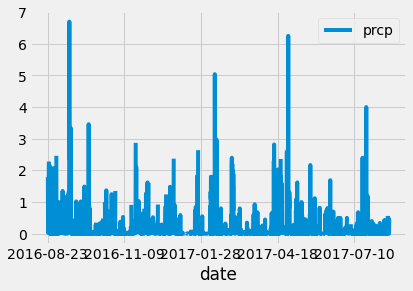

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

year, month, day = [int(x) for x in most_recent_date.split('-')]
print(year, month, day)

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
                        
import datetime
last_year = datetime.date(year - 1, month, day)
print(last_year)


# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp) \
    .filter(Measurement.date >= last_year)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.read_sql_query(query.statement, engine)
print(df)

# Sort the dataframe by date
sorted_df = df.sort_values(by='date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(x='date', y='prcp')



In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()